In [2]:
from rdkit import Chem
from rdkit.Chem import Lipinski
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem as Chem
import matplotlib.pyplot as plt
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import SimilarityMaps


In [3]:
mol = Chem.MolFromSmiles('CC')
print(Lipinski.NumHAcceptors(mol))
print(Descriptors.TPSA(mol))
print(Descriptors.MolLogP(mol))

0
0.0
1.0262


In [4]:
Chem.ComputeGasteigerCharges(mol)
mol.GetAtomWithIdx(0).GetDoubleProp('_GasteigerCharge')

-0.06826238342059164

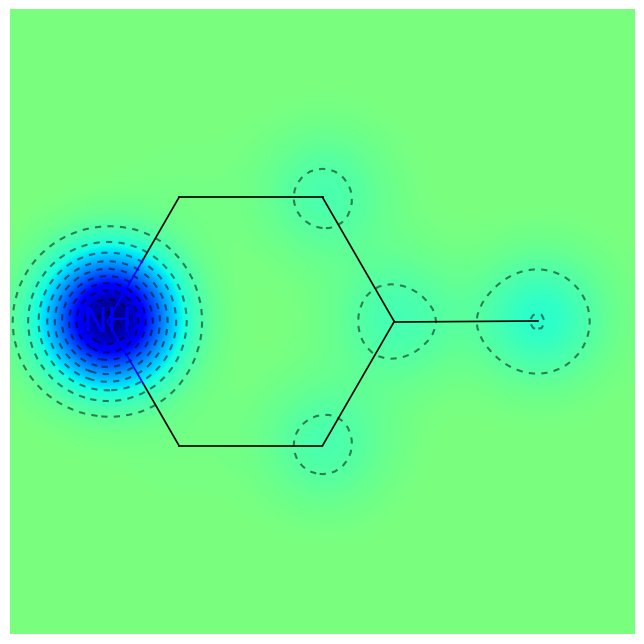

In [5]:
mol = Chem.MolFromSmiles('CC1CCNCC1')
Chem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)
plt.show()

[(0.1441, 2.503), (0.0, 2.433), (0.1441, 2.503), (-0.2035, 2.753), (-0.7096, 2.173), (-0.2035, 2.753), (0.1441, 2.503)]


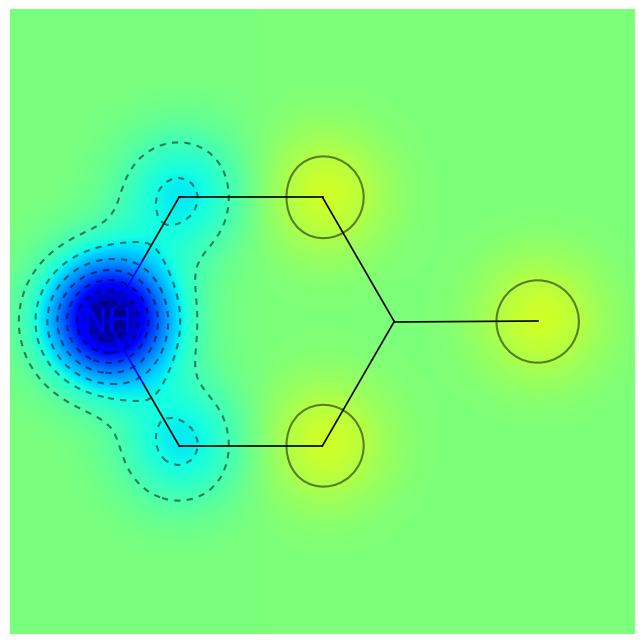

In [6]:
contribs = rdMolDescriptors._CalcCrippenContribs(mol)
print(contribs)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol,[x for x,y in contribs], colorMap='jet', contourLines=10)
plt.show()

In [7]:
print(Descriptors.TPSA(mol), Descriptors.MolLogP(mol), Descriptors.MolWt(mol))

12.03 1.0059 99.17699999999999


In [8]:
mol = Chem.MolFromSmiles('CC1CCNCC1')
AllChem.ComputeGasteigerCharges(mol)

atom = mol.GetAtomWithIdx(0)
atom.GetDoubleProp('_GasteigerCharge')



NameError: name 'AllChem' is not defined

In [ ]:
contribs = [round(mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge'), 2) for i in range(mol.GetNumAtoms())]
print(contribs)

In [ ]:
from rdkit.Chem.Draw import SimilarityMaps
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, contourLines=10)
plt.show()

In [ ]:
contribs = rdMolDescriptors._CalcCrippenContribs(mol)
print(contribs)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, [x for x,y in contribs])
plt.show()

In [ ]:
mol = Chem.MolFromSmiles('CC1CCNCC1')
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
print(contribs)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)
plt.show()

# SMR_VSA

[0.0, 0.0, 5.316788604006331, 5.917906046161393, 19.765380445542643, 13.08951281182515, 0.0, 0.0, 0.0, 0.0]


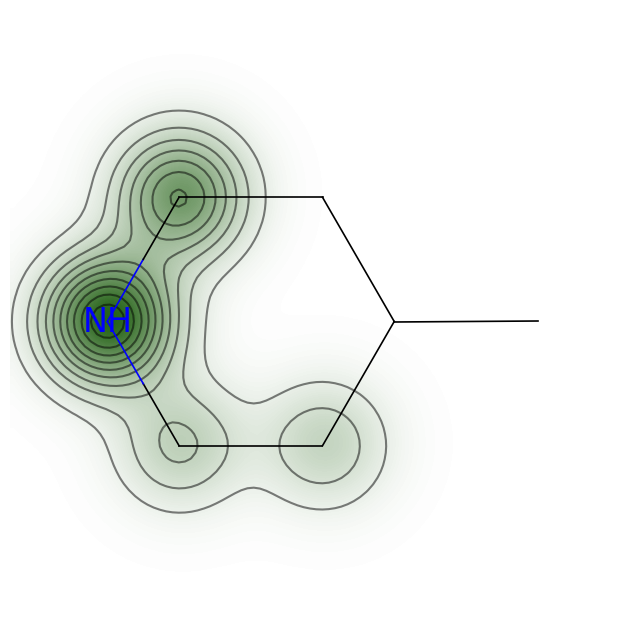

In [9]:
contribs = rdMolDescriptors.SMR_VSA_(mol)
print(contribs)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, contourLines=10)
plt.show()

In [24]:
help(Chem.MolSurf.SlogP_VSA1)

Help on function <lambda> in module rdkit.Chem.MolSurf:

<lambda> lambda x, y=0
    MOE logP VSA Descriptor 1 (-inf < x < -0.40)



# SlogP_VSA1

[5.316788604006331, 13.08951281182515, 0.0, 5.917906046161393, 19.765380445542643, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


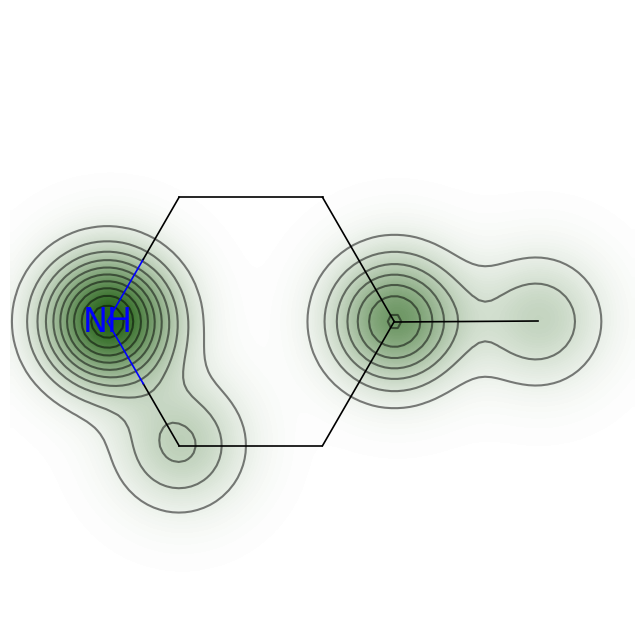

In [10]:
contribs = rdMolDescriptors.SlogP_VSA_(mol)
print(contribs)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, contourLines=10)
plt.show()

# BCUT2D

In [11]:
contribs = rdMolDescriptors.BCUT2D(mol)
meaning = ['mass eigen value high','mass eigen value low','gasteiger charge eigenvalue high',' gasteiger charge low', 'crippen lowgp eigenvalue high', 'crippen lowgp low', 'crippen mr eigenvalue high', 'crippen mr low']
for i in range(len(meaning)):
    print(meaning[i],contribs[i])
    

mass eigen value high 14.857757752066224
mass eigen value low 10.011978663541253
gasteiger charge eigenvalue high 2.0446878586369497
 gasteiger charge low -2.168281171711415
crippen lowgp eigenvalue high 2.0760954253381505
crippen lowgp low -2.2558897621650966
crippen mr eigenvalue high 4.624335338337517
crippen mr low 0.40196931873278524


# Estate

MaxEStateIndex  
MinEStateIndex  
MinAbsEStateIndex  

EState_VSA9  
VSA_EState3  
VSA_EState4  


In [12]:
EStateTypeAtoms = Chem.EState.AtomTypes.TypeAtoms(mol)
EStateTypeAtoms

[('sCH3',),
 ('sssCH',),
 ('ssCH2',),
 ('ssCH2',),
 ('ssNH',),
 ('ssCH2',),
 ('ssCH2',)]

In [13]:
EState = Chem.EState.EStateIndices(mol)
for i,TypeAtoms in enumerate(EStateTypeAtoms):
    print(TypeAtoms[0],EState[i])

sCH3 2.3202777777777777
sssCH 0.9733796296296295
ssCH2 1.375
ssCH2 1.2372685185185186
ssNH 3.315138888888889
ssCH2 1.2372685185185186
ssCH2 1.375


In [14]:
Chem.EState.EState.MaxAbsEStateIndex(mol, force=1)

3.315138888888889

与最大值和最小值有关，还有绝对最小值有关

sCH3 2.1493055555555554
ssCH2 1.2326388888888888
ssCH2 1.1388888888888888
ssNH 3.017361111111111
sCH3 1.9618055555555556
3.017361111111111
1.1388888888888888


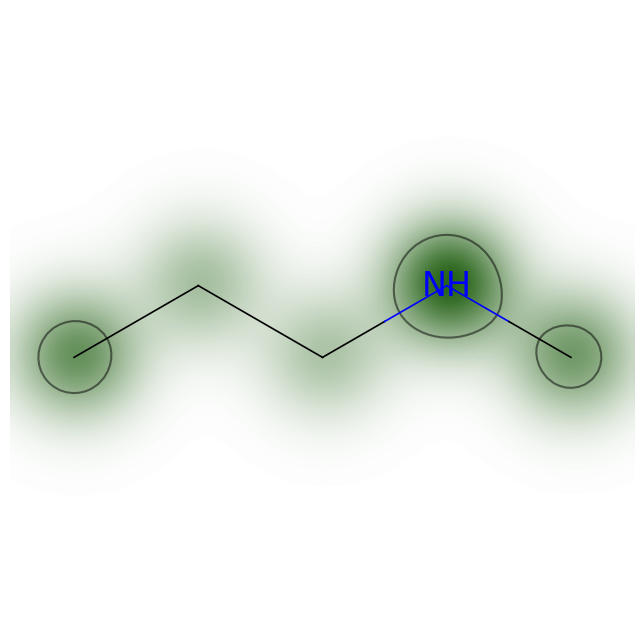

In [20]:
mol = Chem.MolFromSmiles('CCCNC')
EState = Chem.EState.EStateIndices(mol)
EStateTypeAtoms = Chem.EState.AtomTypes.TypeAtoms(mol)
for i,TypeAtoms in enumerate(EStateTypeAtoms):
    print(TypeAtoms[0],EState[i])


fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, EState, contourLines=1)
print(Chem.EState.EState.MaxEStateIndex(mol, force=1))
print(Chem.EState.EState.MinEStateIndex(mol, force=1))
plt.show()



sCH3 2.191805555555556
ssCH2 1.2925
ssCH2 1.3020833333333333
ssCH2 1.1631944444444444
ssNH 3.068611111111111
sCH3 1.9818055555555556
3.068611111111111
1.1631944444444444


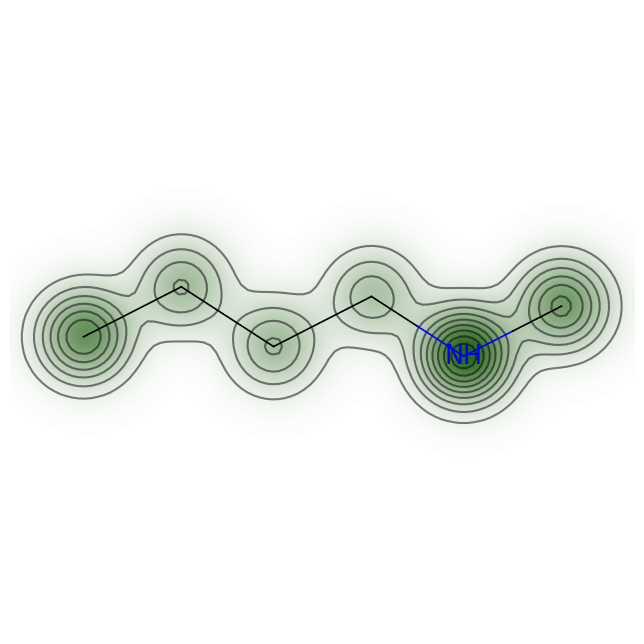

In [167]:
mol = Chem.MolFromSmiles('CCCCNC')
EState = Chem.EState.EStateIndices(mol)
EStateTypeAtoms = Chem.EState.AtomTypes.TypeAtoms(mol)

for i,TypeAtoms in enumerate(EStateTypeAtoms):
    print(TypeAtoms[0],EState[i])

fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, EState, contourLines=10)
print(Chem.EState.EState.MaxEStateIndex(mol, force=1))
print(Chem.EState.EState.MinEStateIndex(mol, force=1))
plt.show()


In [148]:
Chem.EState.EState.MaxAbsEStateIndex(mol, force=1)

3.017361111111111

EState_VSA9  

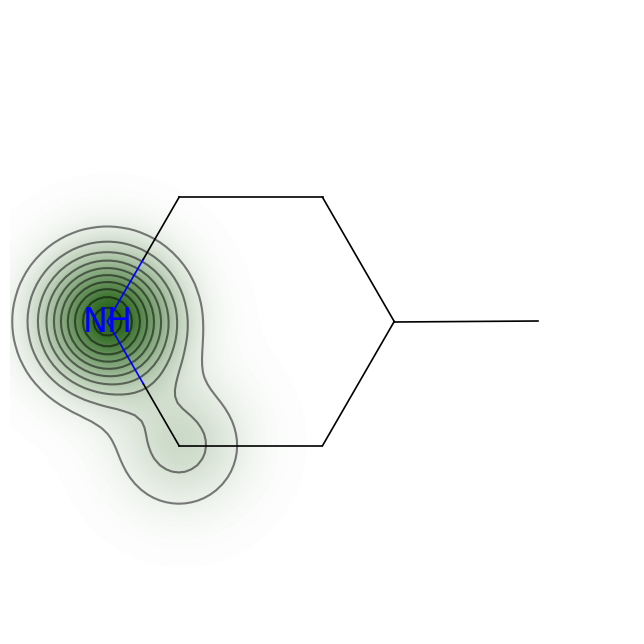

In [136]:
EState_VSA = Chem.EState.EState_VSA.EState_VSA_(mol, bins=None, force=1)

fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, EState_VSA, contourLines=10)
plt.show()

VSA_EState3  
VSA_EState4  

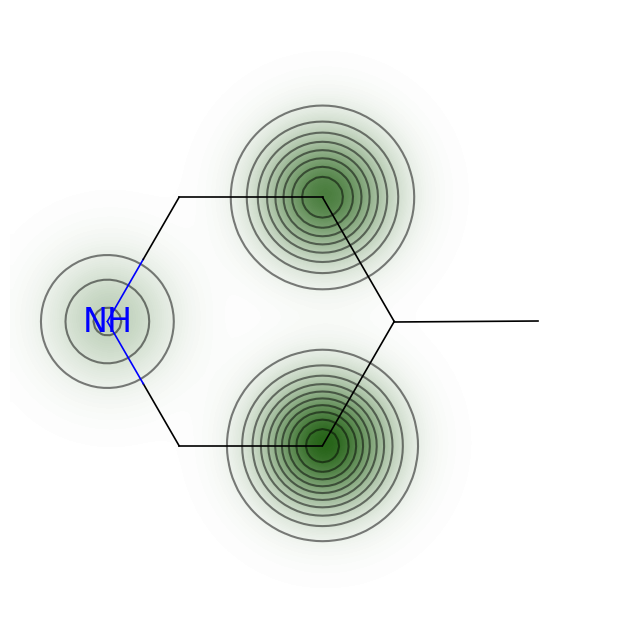

In [137]:
EState_VSA = Chem.EState.EState_VSA.VSA_EState_(mol, bins=None, force=1)

fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, EState_VSA, contourLines=10)
plt.show()